#Breast Cancer Classification using Support Vector Machines (SVM)

**Internship Task 7 – Support Vector Machines**

##Objective

To build accurate binary classification models using **Support Vector Machines (SVM)** with both **linear and non-linear (RBF) kernels**, perform hyperparameter tuning, visualize decision boundaries, and evaluate performance using cross-validation.

##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Load Dataset

In [2]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Feature Scaling

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#SVM MODEL TRAINING

##Linear Kernel SVM

In [5]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193


##RBF Kernel SVM

In [6]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9736842105263158


##HYPERPARAMETER TUNING using GridSearchCV

In [7]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross Validation Accuracy:", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross Validation Accuracy: 0.9736263736263737


##Train Best Model

In [8]:
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_best))

Optimized SVM Accuracy: 0.9824561403508771


#DECISION BOUNDARY VISUALIZATION(2D)

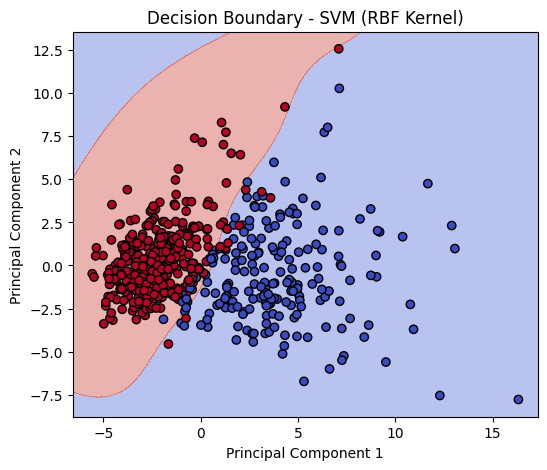

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

model_vis = SVC(kernel='rbf', C=1, gamma='scale')
model_vis.fit(X_train_p, y_train_p)

x_min, x_max = X_pca[:,0].min()-1, X_pca[:,0].max()+1
y_min, y_max = X_pca[:,1].min()-1, X_pca[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundary - SVM (RBF Kernel)")
plt.show()

##Cross Validation Performance

In [10]:
cv_scores = cross_val_score(best_svm, X_scaled, y, cv=10)

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Scores: [1.         0.98245614 0.96491228 0.98245614 0.98245614 0.98245614
 0.92982456 1.         1.         0.96428571]
Mean CV Accuracy: 0.9788847117794484


## 🏁 Conclusion

This project demonstrates the effective application of Support Vector Machines with both linear and non-linear kernels, achieving high classification accuracy through hyperparameter tuning, decision boundary visualization, and cross-validation.